# Introduction to NumPy

`numpy` is at the heart of the Scientific Python Ecosystem. It provides multi-dimensional array manipulation, elementary mathematical functions, random number generators, linear algebra routines, ...

`numpy` is a very large package with several libraries (for all of those things mentioned above). **DO NOT** try to remember all the functions and methods in one sitting. Prioritize understanding some specific concepts we will highlight, which will be much more useful. Leave the listing of functions to the `numpy` documentation. After all, it's free real estate.

<div>
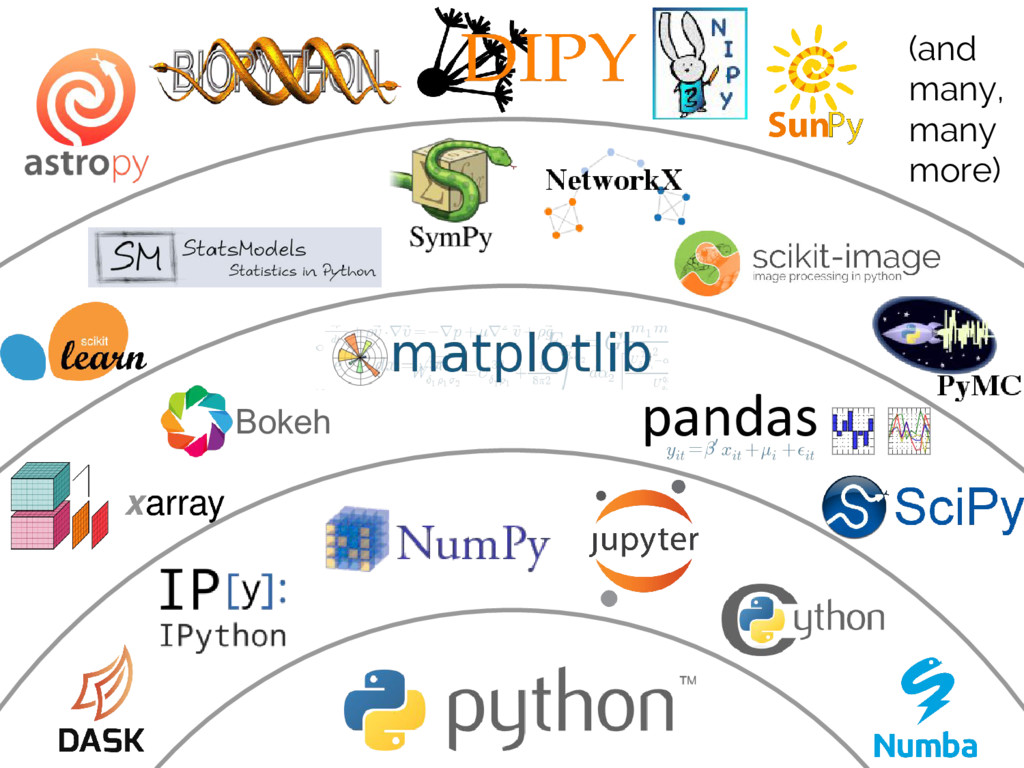
</div>

[Jake Vanderplas PyCon 2017 Keynote](https://speakerdeck.com/jakevdp/the-unexpected-effectiveness-of-python-in-science?slide=52)

This notebook was adapted from an older (less extensive) version at https://github.com/krittikaiitb/tutorials. If you are interested in using Python for Astronomy, do check out the repository and suggest additions!

## External Resources

1. A very good introduction to Python from a Data Science PoV is the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) by [Jake Vanderplas](https://jakevdp.github.io/). The chapter on NumPy is [Introduction to NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)

2. [NumPy documentation](https://numpy.org/doc/stable/) and [NumPy reference](https://numpy.org/doc/stable/reference/index.html): Don't read the entire thing in one sitting!

## Overview:
1. **NumPy Basics**<br>
   We will go a bit fast here. I will ***highlight*** important points and things to remember. (30 min)
2. **Multi-dimensional NumPy arrays**<br>
   We will take it a bit slow here. Key takeaways: slicing, `axis` keyword. (25 min)
3. **NumPy libraries**<br>
   Mixed bag of NumPy functions. (30 min)

In [1]:
import numpy as np

The above line imports the package numpy (which includes all the functions we will be using). The part `as np` renames it to `np` (just for this program, don't worry), which is slightly more convenient. 

## Creating a `numpy` array

There are a lot of ways to create an array (and we will see some in this notebook). The simplest is to create an array from an array-like object (lists, tuples, sets)

***Important***: Convert sequences to Numpy arrays using `np.array`.

In [2]:
array_1 = np.array([1, 2, 3, 4])
array_2 = np.asarray([1, 2, 3, 4])

In [3]:
array_1_copy = np.array(array_1)

In [4]:
array_2_ref = np.asarray(array_2)

In [1]:
array_1_copy[0] = 100
array_2_ref[0] = 100

NameError: name 'array_1_copy' is not defined

In [6]:
print(array_1)
print(array_2)

[1 2 3 4]
[100   2   3   4]


## Element-wise operations

We can do the usual arithmetic operations on a `numpy` array element wise. For example, multiplication by a scalar:

In [1]:
x = np.array([1, 2, 3, 4])
# x = [1, 2, 3, 4]
# x = (1, 2, 3, 4)
y = x * 2


print(f"For {type(x)}:\nx = {x}\ny = {y}")

For <class 'tuple'>:
x = (1, 2, 3, 4)
y = (1, 2, 3, 4, 1, 2, 3, 4)


Element wise operations are great. But they can be done with lists as well (using `for` loops or a list comprehension). What makes `numpy` special?

In [8]:
list_ = list(range(10_000))
array_ = np.array(list_)

In [9]:
%timeit y = [l*2 for l in list_]

459 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit y = array_ * 2

5.61 µs ± 13.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
from itertools import repeat

In [16]:
%timeit y = list(map(pow, list_, repeat(2)))

2.59 ms ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The values above will be different for your computer, but it is clearly obvious that `numpy` arrays are faster.

`numpy` also supports indexing with lists, instead of only integers or slices, whereas lists don't. 

In [22]:
# Here's another way to create a numpy array
x = np.arange(0, 100, 1)
indices = [27, 7, 17, 1]

In [23]:
x[indices]

array([27,  7, 17,  1])

Trying a similar trick with a list instead: (this should give an error!)

In [24]:
x_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(x_[indices])

TypeError: list indices must be integers or slices, not list

Similar to the `len` function, numpy also has several functions to describe an array. Several are also available as methods, which can be used as follows:

In [2]:
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

<i style='color:blue;'>Note: </i> 2D arrays like above require the same number of elements in each row. If you remove say 6 from the above, you'll get a `Warning` from `numpy` talking about "ragged nested sequences". It is unlikely you will encounter a need for these much (unless you want to analyze data from particle accelerators, for example) so we will ignore them for now.

<i style='color:blue;'>Note: </i> If you want to analyze data from particle accelerators, go watch this video: https://www.youtube.com/watch?v=2NxWpU7NArk

In [3]:
print(x.dtype)  # data-type. note the difference between int64 and Python's int
print(x.ndim)  # number of dimensions. This is a 2D array
print(x.shape)  # Shape of array
print(x.size)  # Total number of elements in array (product of elements in shape)

int64
2
(3, 4)
12


<i style='color:blue;'>Note: </i> `numpy` arrays have a method called `astype`

In [8]:
print(x.dtype)

int64


In [53]:
y = x.astype("float")

In [54]:
y.astype("int")

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

<i style='color:blue;'>Note: </i> `numpy` arrays have a method called `reshape`

In [59]:
x.shape

(3, 4)

In [60]:
y = x.reshape((2, 6))

In [61]:
y

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

Multi-dimensional `numpy` arrays can be indexed using multiple indices

In [62]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [63]:
x[1, 2]

7

## Array Operations

Element wise operations also work between arrays of the same shape

In [ ]:
x*x

If you want proper matrix multiplication, convert the `numpy` arrays to a `matrix`, or use `numpy.dot`

In [ ]:
np.matrix(x)*np.matrix(x)

In [ ]:
np.dot(x,x)  # x.dot(x)

Relational operators are also operate element-wise on the array:

In [ ]:
x > 5

In [ ]:
x = np.arange(10)

In [ ]:
(x < 6)

In [ ]:
x > 3

The array of `dtype` `bool` can be used to index an array (it works like you would expect)

In [ ]:
y = np.copy(x) # Simply typing y = x doesnot make a new array, it just adds a reference to the old one.
               # Changes in y will then be reflected in x
y[y > 5] = 0
y

In [ ]:
x = np.arange(10)
y = x[x**2 - 3*x - 5 >= 0]
y

Wondering about logical operators like AND, OR and NOT. You can simply use the bitwise operators `&`, `|` and `~`

In [ ]:
x[(x < 6) & (x > 3)]

In [ ]:
x[(x < 2) | (x > 7)]

In [ ]:
x[~(x == 5)]

## Break: 5 min
Try out the cells, change up values and see what happens. If you have questions, put them up on slido for our mods to answer. We can have a QnA after the content is over on Teams if they are not resolved by then.

#### Summary:
1. Create `numpy` arrays from sequences using `np.array`
2. Operations work element-wise: array-scalar and array-array of same shape
3. Arithmetic operations, relational operations and bit-wise logical operators all work!
4. Array attributes: `dtype`, `ndim`, `shape`, `size`
5. So far, you can index a numpy array with:
    1. An integer
    2. A slice
    3. A list of integers
    4. Another numpy array of the same `shape` with `dtype` `bool`

If we want the indices where a certain condition is satisified, we can use `numpy.where`.

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 0.5, 0.6])
indices = np.where(x < 5)

In [ ]:
indices

`indices` is not a `numpy` array!

It is a `tuple` with as many arrays as the dimension of the array `x`.

In [ ]:
x[indices]

In [ ]:
x = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]])

In [ ]:
indices = np.where(x > 5)

In [ ]:
indices

In [ ]:
x[indices]

Have I been keeping any other way of indexing from you?

## Slicing

Tinker around with the next cell

In [9]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [10]:
x[:, :]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [11]:
ind1 = [True, False, True]
ind2 = [True, False, True, True]

In [15]:
x[ind1, ind2]

array([[1, 3, 4],
       [5, 7, 8]])

We can also delete elements using `numpy.delete`.

In [17]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [18]:
indices = np.where(x[:, 0] > 1)

In [19]:
indices

(array([1, 2]),)

In [20]:
y = np.delete(x, indices, axis=0)
print(y)

[[1 2 3 4]]


In [21]:
y = np.delete(x, indices, axis=1)
print(y)

[[ 1  4]
 [ 5  8]
 [ 9 12]]


In [22]:
x.shape

(3, 4)

Note the argument of the function called `axis`. For a 2D array, `axis=0` is along the "rows", and `axis=1` is along the "columns".

In [23]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [58]:
np.sum(x)

78

## Break: 5 min
Try out the above cells, change up values and see what happens. If you have questions, put them up on slido for our mods to answer. We can have a QnA after the content is over on Teams if they are not resolved by then.

In particular, make sure you understand the parts about slicing a multi-dimensional array, how `numpy.where` works and the `axis` keyword.

#### Summary:
1. Create `numpy` arrays using `np.array`
2. Operations work element-wise: array-scalar and array-array of same shape
3. Array attributes: `dtype`, `ndim`, `shape`, `size`
4. So far, you can index a numpy array with:
    1. An integer
    2. A slice
    3. A list of integers
    4. Another numpy array of the same `shape` with `dtype` `bool`
    5. A tuple of numpy arrays (like in `numpy.where`) although this always return a 'flattened' array
    6. A slice, for each dimension, separated by a comma

## Broadcasting

Broadcasting is magic. We will just have a look at an example here.

To know more about the rules for broadcasting (they are simple, but will take some time to explain), and more examples and practical applications, refer the relevant chapter in [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html).

In [24]:
x = np.arange(3)
y = np.ones((3, 3))

In [25]:
print(x)

[0 1 2]


In [26]:
print(y)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [30]:
y + x

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

## Misc. Methods

In [ ]:
x = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

In [ ]:
x.shape

In [ ]:
# Try also: mean, std, min, max
print(f"Sum of all elements: {x.sum()}")
print(f"Sum along axis 0: {x.sum(0)}")
print(f"Sum along axis 1: {x.sum(1)}")

In [ ]:
x = np.array([0, 1, 3, 2, 4, 6, 10, 230, -1])

In [ ]:
x.shape

In [ ]:
print(f"Max value is at index: {x.argmax()}")
print(f"Min value is at index: {x.argmin()}")